<a href="https://colab.research.google.com/github/koushik0416/predictive_da_2/blob/main/predictive_da_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels openpyxl


**# Step 1: Import necessary libraries`**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

**# Step 2: Load the data**

In [3]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Assuming the uploaded file is in CSV format
file_name = list(uploaded.keys())[0]

# Since the file is an Excel file, use pd.read_excel instead of pd.read_csv
data = pd.read_excel(file_name)

# Display the first few rows of the dataset to verify it loaded correctly
data.head()

print(data.head())
print(data.info())

Saving IMU_Fitness_Tracking_Dataset.xlsx to IMU_Fitness_Tracking_Dataset.xlsx
                Timestamp  Accelerometer_X  Accelerometer_Y  Accelerometer_Z  \
0 2024-11-14 14:11:54.626            -8.54            -4.48            -4.05   
1 2024-11-14 14:06:54.626            -7.34             1.85            -5.91   
2 2024-11-14 14:01:54.626            -4.50             1.43            -2.09   
3 2024-11-14 13:56:54.626             1.30             1.67             8.20   
4 2024-11-14 13:51:54.626            -8.15            -3.84             4.86   

   Gyroscope_X  Gyroscope_Y  Gyroscope_Z  Step_Count Activity_Type  \
0         3.57         4.45         0.76          28       Walking   
1         4.15         4.24         3.84          56       Cycling   
2        -0.12         0.05         0.04           5       Cycling   
3         4.19        -2.59        -0.52          43       Running   
4        -4.39         1.02         4.24          25       Cycling   

  Intensity_Level  C

## Step 3: Preprocess the data
# Convert 'Timestamp' column to datetime format and sort data by it

In [4]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.sort_values(by='Timestamp')


# **Step 4: Calculate basic metrics and display them**

In [6]:

#
total_steps = data['Step_Count'].sum()
total_calories = data['Calories_Burned'].sum()
print(f"Total Steps: {total_steps}")
print(f"Total Calories Burned: {total_calories}")

Total Steps: 48791
Total Calories Burned: 5105.26


<ipython-input-7-d607ba45a3c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


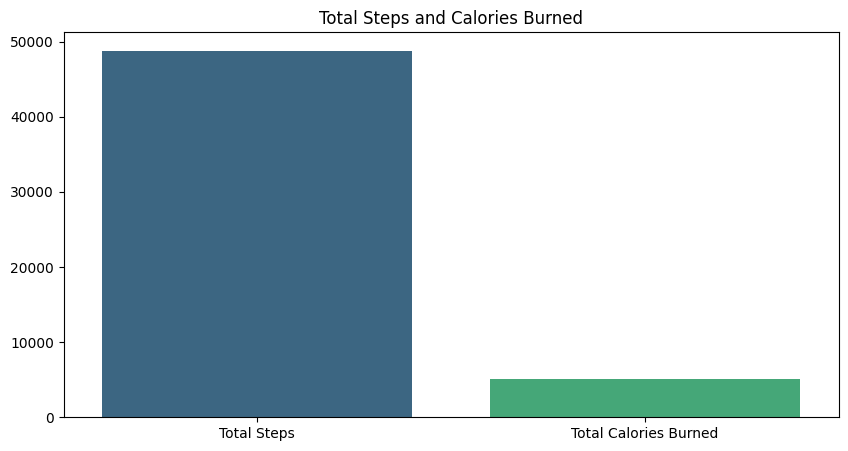

In [7]:
# Visualization for total steps and calories
plt.figure(figsize=(10, 5))
metrics = ['Total Steps', 'Total Calories Burned']
values = [total_steps, total_calories]
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Total Steps and Calories Burned')
plt.show()

Average Calories Burned Per Step: 0.1046


<ipython-input-9-97d6a3db9bc8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Calories per Step'], y=[calories_per_step], palette='viridis')


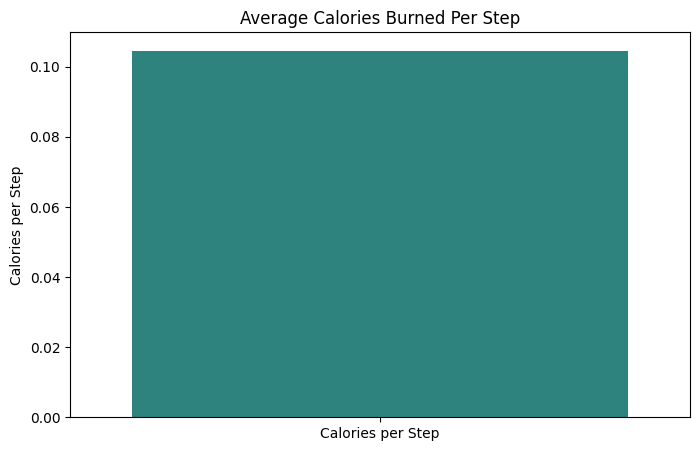

In [9]:

# Calculate calories per step
if total_steps > 0:
    calories_per_step = total_calories / total_steps
else:
    calories_per_step = 0

print(f"Average Calories Burned Per Step: {calories_per_step:.4f}")

# Visualization of calories per step
plt.figure(figsize=(8, 5))
sns.barplot(x=['Calories per Step'], y=[calories_per_step], palette='viridis')
plt.title('Average Calories Burned Per Step')
plt.ylabel('Calories per Step')
plt.show()


# **Step 5: Visualize activity distribution**

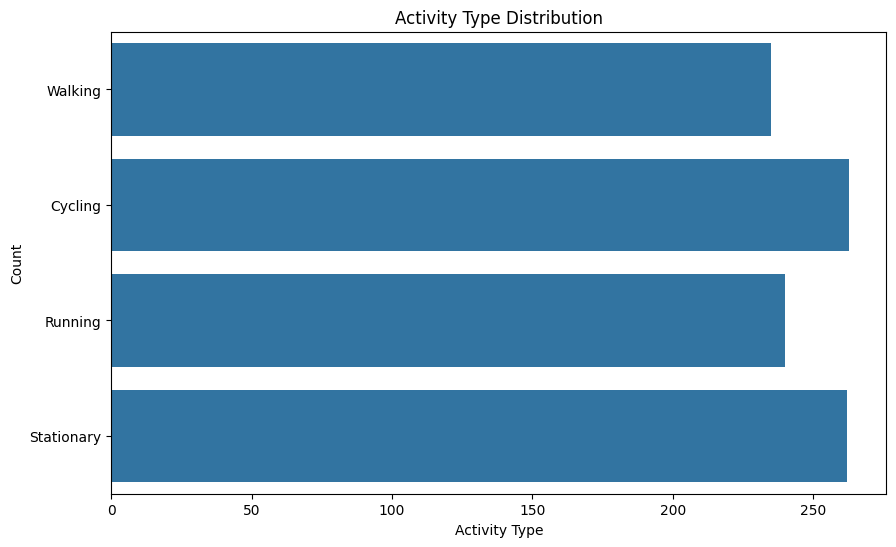

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Activity_Type'])
plt.title('Activity Type Distribution')
plt.xlabel('Activity Type')
plt.ylabel('Count')
plt.show()

# **Step 6: Split data for predictive modeling**

In [11]:
X = data[['Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z', 'Age', 'Height', 'Weight']]
y = data['Activity_Type']  # Change this to 'Predicted_Goal_Completion' for goal prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Step 7: Train a Decision Tree Classifier for activity recognition**

In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# **Step 8: Make predictions and evaluate the classifier**

In [13]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     Cycling       0.32      0.33      0.33        75
     Running       0.27      0.27      0.27        75
  Stationary       0.24      0.25      0.24        77
     Walking       0.29      0.27      0.28        73

    accuracy                           0.28       300
   macro avg       0.28      0.28      0.28       300
weighted avg       0.28      0.28      0.28       300

Accuracy: 0.28


# **Step 9: Plot the confusion matrix as a heatmap**

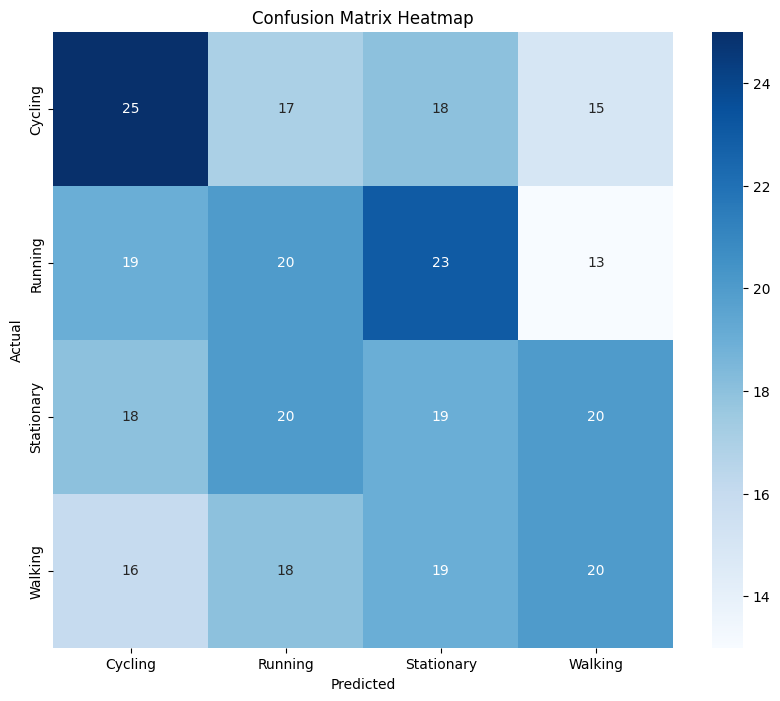

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ** Step 10: Time series forecasting for goal prediction using ARIMA**

In [16]:
goal_completion_series = data['Predicted_Goal_Completion'].map({'Yes': 1, 'No': 0}).astype(float)

In [17]:
# Ensure the time index is appropriate for time series plotting
goal_completion_series.index = data['Timestamp']

# Fit the ARIMA model for goal prediction
model = ARIMA(goal_completion_series, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 7 days
forecast = model_fit.forecast(steps=7)
forecast_index = pd.date_range(start=goal_completion_series.index[-1] + timedelta(days=1), periods=7, freq='D')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


# **Step 11: Plot the observed data and forecast**

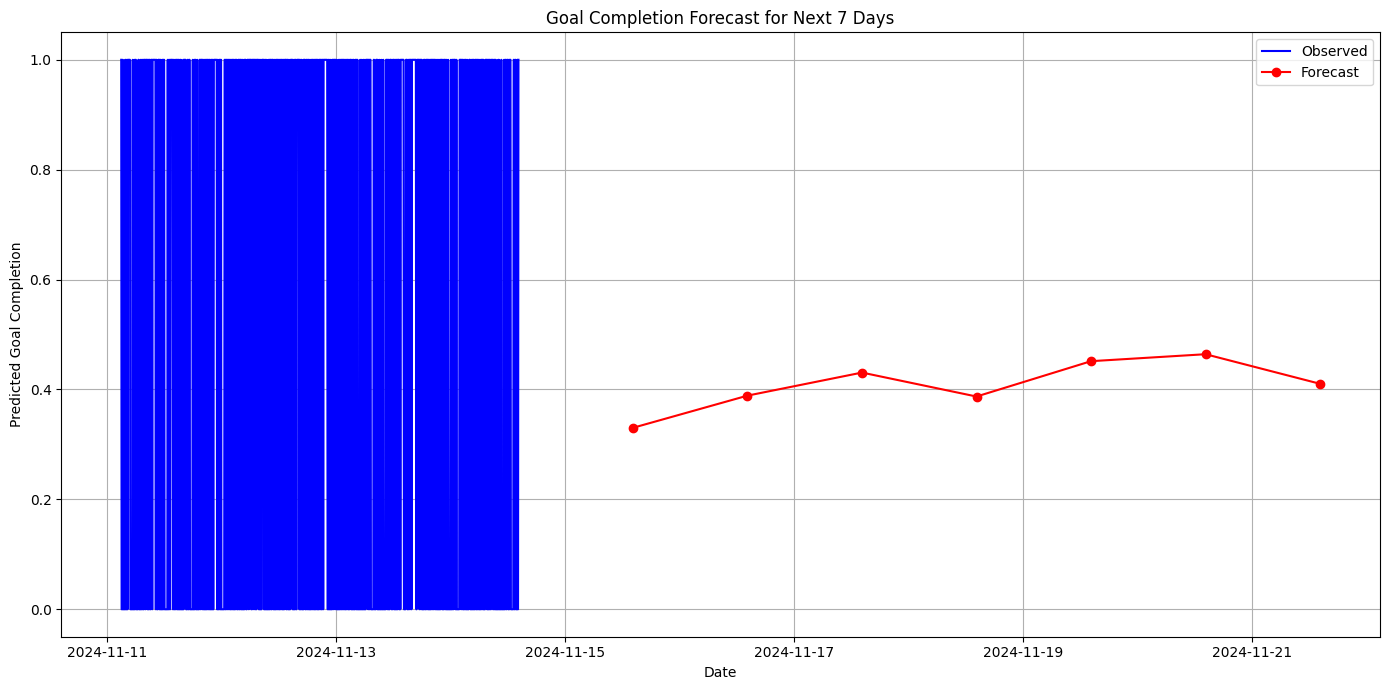

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(goal_completion_series.index, goal_completion_series, label='Observed', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', color='red', marker='o')
plt.title('Goal Completion Forecast for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Goal Completion')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **Goal Completion Forecast for the next 7 days**

In [25]:
# Print the forecasted values
print("Goal Completion Forecast for the next 7 days:")
print(forecast)


Goal Completion Forecast for the next 7 days:
2024-11-14 14:16:54.626    0.330232
2024-11-14 14:21:54.626    0.388800
2024-11-14 14:26:54.626    0.430755
2024-11-14 14:31:54.626    0.387159
2024-11-14 14:36:54.626    0.451494
2024-11-14 14:41:54.626    0.464170
2024-11-14 14:46:54.626    0.410330
Freq: 5min, Name: predicted_mean, dtype: float64


# **` Function for setting personalized goals`**

In [22]:

def set_personalized_goal(user_id, current_steps, fitness_level='Beginner'):
    # Define target steps based on fitness level
    if fitness_level == 'Beginner':
        target_steps = current_steps + 2000
    elif fitness_level == 'Intermediate':
        target_steps = current_steps + 3000
    else:  # Advanced
        target_steps = current_steps + 5000

    print(f"Personalized goal for User {user_id} ({fitness_level}): {target_steps} steps")

# Function to adapt goals based on user progress
def adapt_goals(user_id, current_steps, historical_steps):
    average_steps = np.mean(historical_steps)
    if current_steps >= average_steps:
        print(f"User {user_id}: Great job! Consider increasing your target by 10%.")
    else:
        print(f"User {user_id}: You might need to adjust your target. Try focusing on consistency.")

# Demonstration with user input
user_id = input("Enter User ID: ")
current_steps = int(input("Enter current step count: "))
historical_steps = data[data['User_ID'] == user_id]['Step_Count']

fitness_level = input("Enter fitness level (Beginner/Intermediate/Advanced): ")
set_personalized_goal(user_id, current_steps, fitness_level)
adapt_goals(user_id, current_steps, historical_steps)

# Save the processed data to a new CSV file
data.to_csv('processed_fitness_data.csv', index=False)
print("\nProcessed data has been saved to 'processed_fitness_data.csv'")


Enter User ID: 25
Enter current step count: 2500
Enter fitness level (Beginner/Intermediate/Advanced): Beginner
Personalized goal for User 25 (Beginner): 4500 steps
User 25: You might need to adjust your target. Try focusing on consistency.

Processed data has been saved to 'processed_fitness_data.csv'
